# <font color = 'blue'> Logistic Regression to identify leads for a marketing campaign </font>

## Problem Statment:
## ---------------------------

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

### Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

In [82]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Viewing the dataset
dat = pd.read_csv('Leads.csv')
dat.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [83]:
# Checking the dimensions of the dataframe
dat.shape

(9240, 37)

#### We have 9240 rows and and 37 dimensions or features

In [84]:
# Checking the statistical aspect and info of the dataframe
dat.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Above shows the stats of the seven numeric columns that we have in the dataframe

In [85]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## DATA CLEANING

In [86]:
# Checking for percentages of missing values in each column
round(100*(dat.isnull().sum()/dat.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Let us assume that we select 40% as the cutoff for the missing values, above which we will remove that column from the dataframe. According to the above missing value list, we see that there are 5 columns which are above the 40% : 
- Lead Quality                : Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead. 
- Asymmetrique Activity Index : An index and score assigned to each customer based on their activity and their profile
- Asymmetrique Profile Index  : An index and score assigned to each customer based on their activity and their profile
- Asymmetrique Activity Score : An index and score assigned to each customer based on their activity and their profile
- Asymmetrique Profile Score  : An index and score assigned to each customer based on their activity and their profile

#### Based on the meta-data description as well, we see that the parameters are not that important in deciding the lead score as intuition and index is not useful since anyways we are calculating the Lead Score. So we can remove these 4 columns

In [87]:
dat.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1, inplace = True)
dat.shape

(9240, 32)

In [88]:
# Checking the number of 'Select' values in all the columns so that we can replace them with NULL values
dat.isin(['Select']).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [89]:
# Replacing Select with NaN values and then checking the Selct and NULL values again
dat.replace('Select', np.nan, inplace = True)

In [90]:
dat.isin(['Select']).sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [91]:
round(100*(dat.isnull().sum()/dat.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Now with the above result and other factors dropping some of the other rows like :  
- Lead Profile, City(as it is not very important and creates unnecessary bias), How did you hear about X education : because close to 40% and above missing values
- Dropping columns like Do Not Call, country, What matters most to you in choosing a course,Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital, Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque : As all these columns have only one value and of no use in forming analysis.
- Dropping columns like Country as 70% of the country is India and will create unnecessary bias

In [92]:
list_remove = ['Lead Profile','City','Country','How did you hear about X Education','Do Not Call',
               'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
               'Get updates on DM Content','I agree to pay the amount through cheque']
dat.drop(list_remove, axis = 1, inplace = True)
dat.shape

(9240, 15)

In [93]:
round(100*(dat.isnull().sum()/dat.shape[0]),3)

Prospect ID                                0.000
Lead Number                                0.000
Lead Origin                                0.000
Lead Source                                0.390
Do Not Email                               0.000
Converted                                  0.000
TotalVisits                                1.483
Total Time Spent on Website                0.000
Page Views Per Visit                       1.483
Last Activity                              1.115
Specialization                            36.580
What is your current occupation           29.113
Tags                                      36.288
A free copy of Mastering The Interview     0.000
Last Notable Activity                      0.000
dtype: float64

#### Analysing the remain 7 columns with missing values to know what are the categorical variable count in each to decide on the steps for imputation. 
- Imputing with MEAN value for TotalVisits, Page Views Per Visit. 
- For 'Lead Source' deleting the missing value rows. 
- For 'What is your current occupation' imputing with Mode value : 'Unemployed'.
- For 'Last Activity' : deleting the missing value rows

In [94]:
dups_Lead_s = dat.pivot_table(index=['Lead Source'], aggfunc='size')
print (dups_Lead_s)
print('\n')
dups_curr_o = dat.pivot_table(index=['What is your current occupation'], aggfunc='size')
print (dups_curr_o)
print('\n')
dups_last_a = dat.pivot_table(index=['Last Activity'], aggfunc='size')
print (dups_last_a)
print('\n')
dups_sp = dat.pivot_table(index=['Specialization'], aggfunc='size')
print (dups_sp)
print('\n')
dups_tags = dat.pivot_table(index=['Tags'], aggfunc='size')
print (dups_tags)

Lead Source
Click2call              4
Direct Traffic       2543
Facebook               55
Google               2868
Live Chat               2
NC_EDM                  1
Olark Chat           1755
Organic Search       1154
Pay per Click Ads       1
Press_Release           2
Reference             534
Referral Sites        125
Social Media            2
WeLearn                 1
Welingak Website      142
bing                    6
blog                    1
google                  5
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64


What is your current occupation
Businessman                8
Housewife                 10
Other                     16
Student                  210
Unemployed              5600
Working Professional     706
dtype: int64


Last Activity
Approached upfront                 9
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Email Marked Spam                  2
Email O

In [95]:
# Filling with Mean values TotalVisits, Page Views Per Visit.
dat['TotalVisits'].fillna((dat['TotalVisits'].mean()), inplace = True)
dat['Page Views Per Visit'].fillna((dat['Page Views Per Visit'].mean()), inplace = True)

In [96]:
# Filling unemployed for Mode value in What is your current occupation
dat['What is your current occupation'].fillna(dat['What is your current occupation'].mode().iloc[0], inplace = True)

In [97]:
# Deleting missing value rows for Last Activity and Lead Source
dat = dat.dropna(axis=0, subset=['Last Activity'])
dat = dat.dropna(axis=0, subset=['Lead Source'])

In [98]:
round(100*(dat.isnull().sum()/dat.shape[0]),3)

Prospect ID                                0.000
Lead Number                                0.000
Lead Origin                                0.000
Lead Source                                0.000
Do Not Email                               0.000
Converted                                  0.000
TotalVisits                                0.000
Total Time Spent on Website                0.000
Page Views Per Visit                       0.000
Last Activity                              0.000
Specialization                            36.252
What is your current occupation            0.000
Tags                                      36.625
A free copy of Mastering The Interview     0.000
Last Notable Activity                      0.000
dtype: float64

In [99]:
#Data loss percent till now
round((100*(9240 - dat.shape[0])/9240),2)

1.48

In [100]:
# Deleting 15 rows with 'Other' as employment occupation to reduce the dummy variable
dat = dat[~(dat['What is your current occupation'] == 'Other')]

In [101]:
# Reseting index after deleting the rows
dat.reset_index(inplace = True, drop = True)
dat

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.000000,0,0.00000,Page Visited on Website,NaN,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.000000,674,2.50000,Email Opened,NaN,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.000000,1532,2.00000,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.000000,305,1.00000,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.000000,1428,1.00000,Converted to Lead,NaN,Unemployed,Will revert after reading the email,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.000000,0,0.00000,Olark Chat Conversation,NaN,Unemployed,NaN,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.000000,1640,2.00000,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,0,0.000000,0,0.00000,Olark Chat Conversation,NaN,Unemployed,NaN,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,0,2.000000,71,2.00000,Email Opened,IT Projects Management,Unemployed,NaN,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,0,4.000000,58,4.00000,Email Opened,Finance Management,Unemployed,NaN,No,Email Opened


#### Now we are left with Specicialization and Tags with missing values. On seeing the count of different categorical values which have those missing values, we see that there is no clear Mode value winner that can be used as seen below : 

In [102]:
print(dups_sp)
print('\n')
print(dups_tags)

Specialization
Banking, Investment And Insurance    338
Business Administration              403
E-Business                            57
E-COMMERCE                           112
Finance Management                   976
Healthcare Management                159
Hospitality Management               114
Human Resource Management            848
IT Projects Management               366
International Business               178
Marketing Management                 838
Media and Advertising                203
Operations Management                503
Retail Management                    100
Rural and Agribusiness                73
Services Excellence                   40
Supply Chain Management              349
Travel and Tourism                   203
dtype: int64


Tags
Already a student                                     465
Busy                                                  186
Closed by Horizzon                                    358
Diploma holder (Not Eligible)                        

#### Calculating the probability of selection of each categorical variable in 'Specialization' and 'Tags' for selection in the random function

In [103]:
import random
sp_list = (dups_sp/dups_sp.sum()).tolist()
tags_list = (dups_tags/dups_tags.sum()).tolist()

#### So we will use randomised function to select random values for these 2 columns using the probabilities of each variable in these 2 columns

In [104]:
for i in range(dat.shape[0]):
    if (str(dat.loc[i,'Specialization']) == 'nan'):
        sp_rand = np.random.choice(dups_sp.index, p = sp_list)
        dat.loc[i,'Specialization'] = sp_rand
    
    if (str(dat.loc[i,'Tags']) == 'nan'):
        tags_rand = np.random.choice(dups_tags.index, p = tags_list)
        dat.loc[i,'Tags'] = tags_rand

In [105]:
round(100*(dat.isnull().sum()/dat.shape[0]),3)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [106]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 15 columns):
Prospect ID                               9088 non-null object
Lead Number                               9088 non-null int64
Lead Origin                               9088 non-null object
Lead Source                               9088 non-null object
Do Not Email                              9088 non-null object
Converted                                 9088 non-null int64
TotalVisits                               9088 non-null float64
Total Time Spent on Website               9088 non-null int64
Page Views Per Visit                      9088 non-null float64
Last Activity                             9088 non-null object
Specialization                            9088 non-null object
What is your current occupation           9088 non-null object
Tags                                      9088 non-null object
A free copy of Mastering The Interview    9088 non-null object
Last Notable

In [107]:
dat.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Human Resource Management,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Human Resource Management,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Marketing Management,Unemployed,Will revert after reading the email,No,Modified


#### Total number of dummy variables to be created

In [108]:
dum_no = dat['Lead Origin'].value_counts().count() + dat['Lead Source'].value_counts().count() + dat['Last Activity'].value_counts().count() + dat['Specialization'].value_counts().count() + dat['What is your current occupation'].value_counts().count() + dat['Tags'].value_counts().count() + dat['Last Notable Activity'].value_counts().count()-7
dum_no

100

In [109]:
dat['What is your current occupation'].value_counts()

Unemployed              8182
Working Professional     683
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

## DATA PREPARATION

### Outlier Treatment : Checking for boxplots for numeric columns : 'TotalVisits 	Total Time Spent on Website 	Page Views Per Visit'  

In [110]:
dat.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9088.000000,9088.000000,9088.000000,9088.000000,9088.000000
mean,617073.219300,0.378851,3.450144,483.079996,2.368391
std,23369.880772,0.485128,4.846406,545.329483,2.156601
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596390.250000,0.000000,1.000000,11.000000,1.000000
50%,615323.000000,0.000000,3.000000,246.000000,2.000000
75%,637212.500000,1.000000,5.000000,921.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


Text(0.5, 1.0, 'Page Views Per Visit')

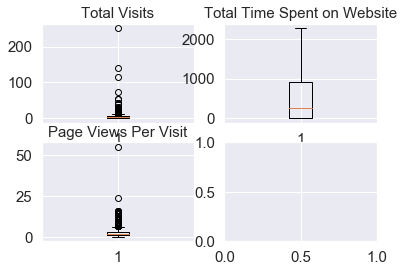

In [111]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(dat.TotalVisits)
axs[0, 0].set_title('Total Visits')
axs[0, 1].boxplot(dat['Total Time Spent on Website'])
axs[0, 1].set_title('Total Time Spent on Website')
axs[1, 0].boxplot(dat['Page Views Per Visit'])
axs[1, 0].set_title('Page Views Per Visit')

#### Not treating outliers as the some of the outlier values can always be potential Hot Leads

#### Converting some binary variables (Yes/No) to 0/1

In [112]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
dat[varlist] = dat[varlist].apply(binary_map)

In [113]:
dat.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Human Resource Management,Unemployed,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Human Resource Management,Unemployed,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Marketing Management,Unemployed,Will revert after reading the email,0,Modified


#### For categorical variables with multiple levels, create dummy features
- Dummy variable list = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Last Notable Activity']

In [114]:
dum_features = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Last Notable Activity']
dummy_dat = pd.get_dummies(dat[dum_features], drop_first=True)
dummy_dat.shape

(9088, 100)

#### Adding the result to the master dataframe

In [115]:
# Adding the results to the master dataframe
dat = pd.concat([dat, dummy_dat], axis=1)

#### Dropping the repeated variables for which dummies have been created

In [116]:
dat = dat.drop(dum_features, 1)
dat.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [117]:
dat.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [118]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Columns: 108 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(5), object(1), uint8(100)
memory usage: 1.4+ MB


### Test - Train Split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# Putting feature variables into X and response or dependant variables into y
X = dat.drop(['Prospect ID','Lead Number','Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [121]:
y = dat['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the X features

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3392,0,-0.878030,-0.890324,-1.080876,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1011,0,-0.361501,-0.301177,-0.171453,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5138,0,0.155028,-0.752673,0.737971,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3188,

In [125]:
# Checking the conversion rate
conv = (sum(dat['Converted'])/len(dat['Converted'].index))*100
conv

37.885123239436616

# -- Correlation and Model Building by RFE and GLM -- Suhas

In [126]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [127]:
#Lets calculate the correlation coefficient between variables
Xcorr = X_train.corr().abs()

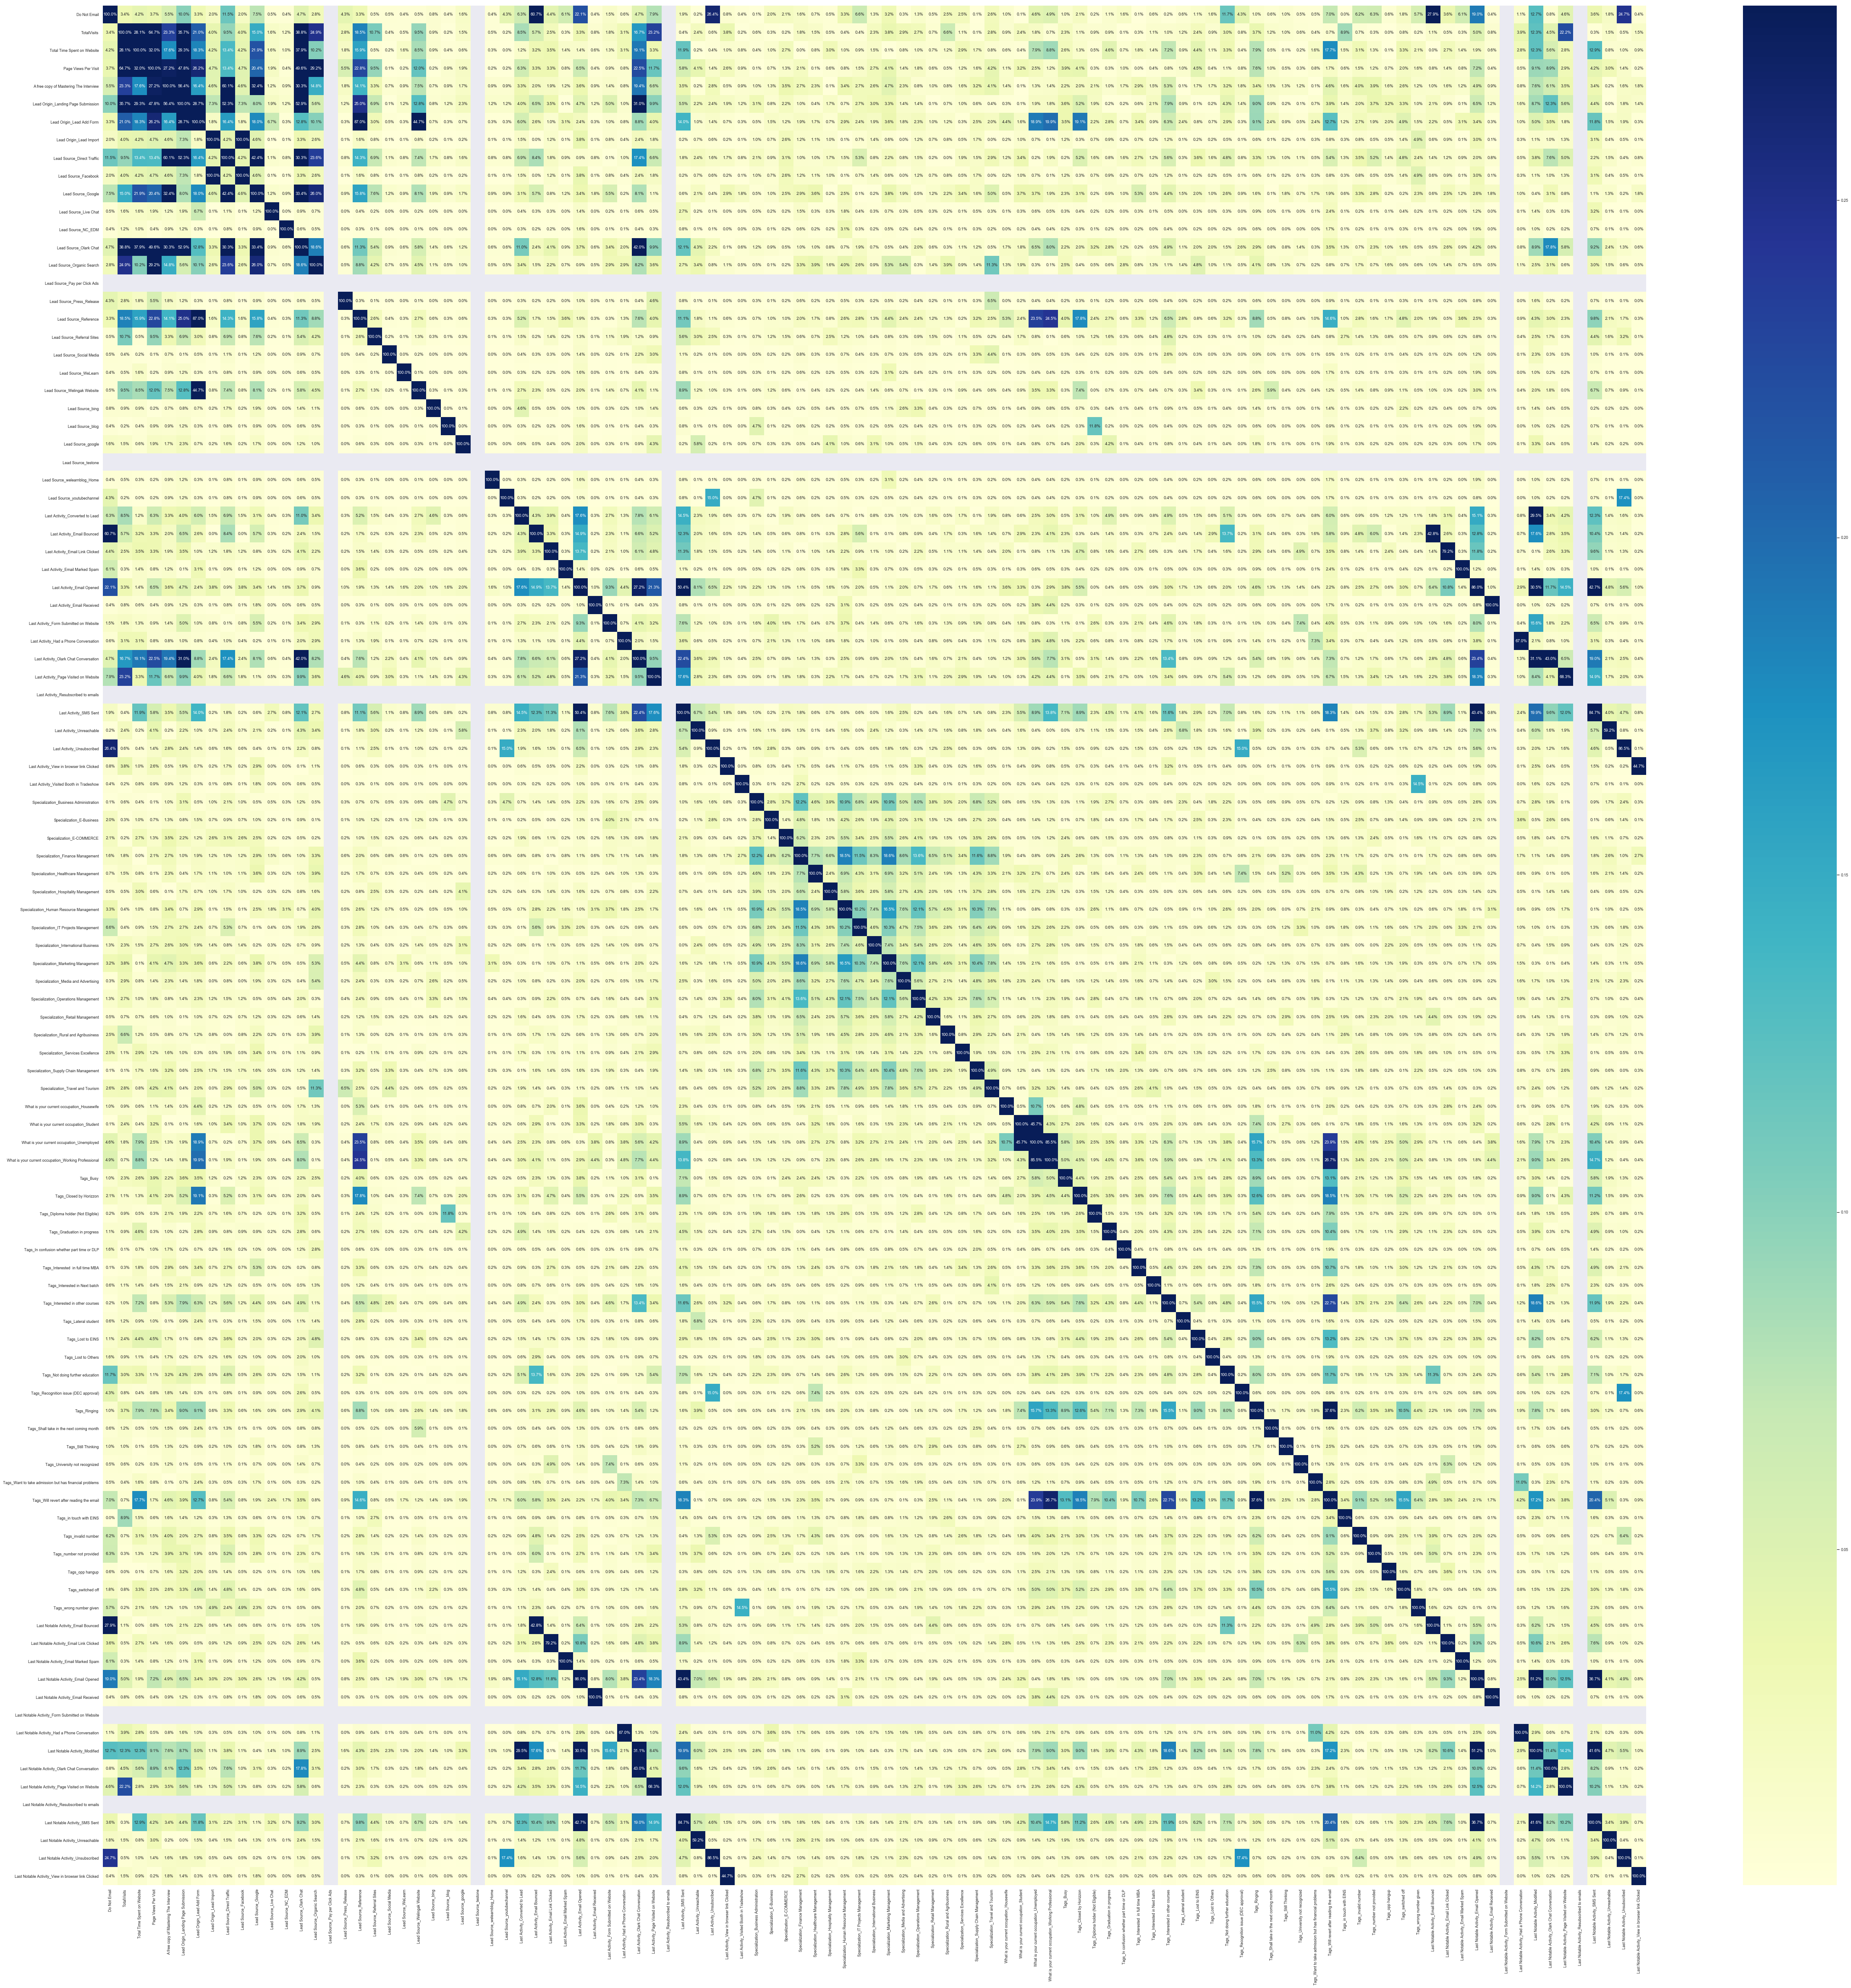

In [128]:
# Lets look at the correlation matrix
import seaborn as sns
sns.set(font_scale=0.8)
plt.figure(figsize=(80,80))
sns.heatmap(Xcorr, cmap='YlGnBu', annot=True, fmt='.1%', robust=True)
plt.show()

In [129]:
# Get upper triangle of correlation matrix
upper = Xcorr.where(np.triu(np.ones(Xcorr.shape), k=1).astype(np.bool))

# Get all columns which display more than 85% correlation
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.85)]
high_corr_cols

['Lead Source_Facebook',
 'Lead Source_Reference',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Email Received',
 'Last Notable Activity_Unsubscribed']

In [130]:
#Now lets drop these columns
X_train.drop(columns=high_corr_cols, inplace=True)

### Using RFE to select top 20 features.

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, roc_curve

In [132]:
X_train.sort_index(axis=1, inplace=True)
X_test.sort_index(axis=1, inplace=True)

In [133]:
#creating an instance of Logistic Regression
logreg = LogisticRegression()

#creating an instance of RFE to select top 20 features
rfe = RFE(logreg, 20).fit(X_train, y_train)

In [134]:
#Looking at the top 20 features selected by RFE
X_train.columns[rfe.support_].tolist()

['Do Not Email',
 'Last Activity_Olark Chat Conversation',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unreachable',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Still Thinking',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_switched off',
 'Total Time Spent on Website',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed']

In [135]:
#Retaining only columns selected by RFE in X_train
X_train = X_train.loc[:,list(rfe.support_)]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 3392 to 5640
Data columns (total 20 columns):
Do Not Email                                      6361 non-null int64
Last Activity_Olark Chat Conversation             6361 non-null uint8
Last Notable Activity_Had a Phone Conversation    6361 non-null uint8
Last Notable Activity_SMS Sent                    6361 non-null uint8
Last Notable Activity_Unreachable                 6361 non-null uint8
Lead Origin_Lead Add Form                         6361 non-null uint8
Lead Source_Olark Chat                            6361 non-null uint8
Lead Source_Welingak Website                      6361 non-null uint8
Tags_Busy                                         6361 non-null uint8
Tags_Closed by Horizzon                           6361 non-null uint8
Tags_Lost to EINS                                 6361 non-null uint8
Tags_Ringing                                      6361 non-null uint8
Tags_Still Thinking                               

### Building model using statsmodels with top 20 features given by RFE

In [136]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
X_train_sm = sm.add_constant(X_train)
logreg_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

In [138]:
print(logreg_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6361
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.2
Date:                Mon, 06 Jan 2020   Deviance:                       3896.4
Time:                        23:23:22   Pearson chi2:                 7.09e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5876  

### Now lets do an iterative check of VIF and p-values to eliminate insiginificant features

In [139]:
# setting the significance level at 5%.
significance_level = 0.05

#Check for feature elimination using vif
vif = pd.DataFrame()
vif['Feature'] = X_train.columns.tolist()
vif['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
vif.sort_values(by='VIF', ascending=False, inplace=True)
max_vif = vif.iloc[0][1]

# perform elimination until all features in the model have VIF below 5.00
while (max_vif > 5.00):

    #Get the feature with maximum VIF
    eliminating_feature = vif.iloc[0][0]

    #print the eliminating feature which is having maximum VIF value
    print('Eliminating Feature: ' + eliminating_feature + ' | VIF : ', max_vif)

    #remove this feature from the model (X_train)
    X_train.drop(columns=eliminating_feature, inplace=True)

    # Adding a constant to X_train to obtain y-intercept from statsmodel
    X_train_sm = sm.add_constant(X_train)

    # create an instance of statsmodels GLM using y_train and X_train_sm and then fit
    logreg_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

    #Get the summary of model into a dataframe, tables is a list and second element contains coefficeints and pvalues.
    df_result = logreg_sm.summary2().tables[1]

    #Remove the p-value for y-intercept before selecting feature with maximum p-value
    df_result.drop('const', axis=0, inplace=True)

    #Calculate max_pvalue
    max_pvalue = max(df_result['P>|z|'])
    #
    while (max_pvalue > significance_level):

        #Get the feature with max_pvalue
        eliminating_feature = df_result.index[df_result['P>|z|'] == max_pvalue].tolist()[0]

        #print the feature to be eliminated and it p-value
        print('Eliminating Feature: ' + eliminating_feature + ' | p-value : ', max_pvalue)

        #remove this feature from the model (X_train)
        X_train.drop(columns=eliminating_feature, inplace=True)

        # Adding a constant to X_train to obtain y-intercept from statsmodel
        X_train_sm = sm.add_constant(X_train)

        # create an instance of statsmodels GLM using y_train and X_train_sm and then fit
        logreg_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

        #Get the summary of model into a dataframe, tables is a list and second element contains coefficeints and pvalues.
        df_result = logreg_sm.summary2().tables[1]

        #Remove the p-value for y-intercept before selecting feature with maximum p-value
        df_result.drop('const', axis=0, inplace=True)

        #Calculate max_pvalue
        max_pvalue = max(df_result['P>||'])
    #
    #check VIF after recursive elimination
    vif = pd.DataFrame()
    vif['Feature'] = X_train.columns.tolist()
    vif['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
    vif.sort_values(by='VIF', ascending=False, inplace=True)
    #calculate maximum VIF again
    max_vif = vif.iloc[0][1]

In [140]:
#Lastly check the p-values again to see if any feature elimination needed
df_result = logreg_sm.summary2().tables[1]
df_result.drop('const', axis=0, inplace=True)
max_pvalue = max(df_result['P>|z|'])

# Loop to perform feature elimination
while (max_pvalue > significance_level):
    
    #Get the feature with max_pvalue
    eliminating_feature = df_result.index[df_result['P>|z|'] == max_pvalue].tolist()[0]
    
    #print the feature to be eliminated and it p-value
    print('Eliminating Feature: ' + eliminating_feature + ' | p-value : ', max_pvalue)
    
    #remove this feature from the model (X_train)
    X_train.drop(columns=eliminating_feature, inplace=True)
    
    # Adding a constant to X_train to obtain y-intercept from statsmodel
    X_train_sm = sm.add_constant(X_train)

    # create an instance of statsmodels GLM using y_train and X_train_sm and then fit
    logreg_sm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
    
    #Get the summary of model into a dataframe, tables is a list and second element contains coefficeints and pvalues.
    df_result = logreg_sm.summary2().tables[1]
    
    #Remove the p-value for y-intercept before selecting feature with maximum p-value
    df_result.drop('const', axis=0, inplace=True)
    
    #Calculate max_pvalue
    max_pvalue = max(df_result['P>|z|'])
#

Eliminating Feature: Last Notable Activity_Had a Phone Conversation | p-value :  0.9985115039386515
Eliminating Feature: Tags_number not provided | p-value :  0.07623805834878818
Eliminating Feature: Tags_invalid number | p-value :  0.060697150200797655


In [141]:
#Lets look at the summary of the final model
print(logreg_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6361
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1959.3
Date:                Mon, 06 Jan 2020   Deviance:                       3918.5
Time:                        23:23:23   Pearson chi2:                 7.00e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6310      0.237   

In [142]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns.tolist()
vif['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Feature,VIF
16,What is your current occupation_Unemployed,3.37
12,Tags_Will revert after reading the email,2.14
5,Lead Source_Olark Chat,1.77
10,Tags_Ringing,1.69
4,Lead Origin_Lead Add Form,1.60
2,Last Notable Activity_SMS Sent,1.46
1,Last Activity_Olark Chat Conversation,1.41
14,Total Time Spent on Website,1.36
6,Lead Source_Welingak Website,1.29
8,Tags_Closed by Horizzon,1.23


### The above model looks like a good one with features having low p-values and VIF.

In [143]:
#Lets predict the probability of leads
y_train_pred = logreg_sm.predict(X_train_sm)
y_train_pred.head()

3392    0.013227
1011    0.373815
5138    0.012218
3188    0.030325
5645    0.958793
dtype: float64

In [144]:
#Lets contruct a dataframe with converted column and predicted probabilities.
result = pd.DataFrame({'Converted':y_train,'Conversion_Probability':y_train_pred})
result.head()

,Converted,Conversion_Probability
3392,0,0.013227
1011,1,0.373815
5138,0,0.012218
3188,0,0.030325
5645,1,0.958793


In [145]:
#Lets use 0.5 as the cut-off probability just to check the accuracy of the model.
result['Label_Predicted'] = result['Conversion_Probability'].apply(lambda val : 1 if val > 0.50 else 0)
result.head(10)

,Converted,Conversion_Probability,Label_Predicted
3392,0,0.013227,0
1011,1,0.373815,0
5138,0,0.012218,0
3188,0,0.030325,0
5645,1,0.958793,1
7245,0,0.045076,0
4346,1,0.715104,1
9038,0,0.003103,0
42,0,0.015682,0
238,1,0.929443,1


In [146]:
# Let's check the accuracy of this model
print(accuracy_score(result['Converted'], result['Label_Predicted']))

0.8787926426662475


In [147]:
#Lets look at the confusion matrix
confusion = confusion_matrix(result['Converted'], result['Label_Predicted'])
confusion

array([[3666,  279],
       [ 492, 1924]], dtype=int64)

#### Looking at the Sensitivity, Specificity and Precision of this model

In [148]:
#Lets first take all positive and negative from confusion matrix
tn, fp, fn, tp = confusion.ravel()
print('TP = ', tp)
print('FP = ', fp)
print('TN = ', tn)
print('FN = ', fn)

TP =  1924
FP =  279
TN =  3666
FN =  492


In [149]:
#Sensitivity is the percenatge of positive predictions compared with total actual positives (ones)
print('Sensitivity % = ', round((100*(tp/(tp+fn))),2))

Sensitivity % =  79.64


In [150]:
#Specificity is the percenatge of negative predictions compared with total actual negatives (zeros)
print('Specificity % = ', round((100*(tn/(tn+fp))),2))

Specificity % =  92.93


In [151]:
#Precision of the model is the percentage of true postive predictions compared with total positive predictions.
print('Precision % = ', round((100*(tp/(tp+fp))),2))

Precision % =  87.34


#### The values of accuray, sensitivity and specificity doesn't look bad with a probablity cut-off of 0.5. But sensitivity is low when compared with specificity meaning model is predicting negatives well than positives.

### Lets look at the ROC curve and also determine the optimal cut-off

In [152]:
#lets get the false positive rate (1 - Specificity) and true positive rate (Sensitivity)
#for every poosible probability cutoff
fpr, tpr, thresholds = roc_curve(result['Converted'], result['Conversion_Probability'], drop_intermediate = False)

#Lets also get the measure of area under the ROC curve
auc_measure = roc_auc_score(result['Converted'], result['Conversion_Probability'])

In [153]:
list(zip(fpr, tpr, thresholds))[-5:-1]

[(0.9989860583016477, 1.0, 0.0015346062815367345),
 (0.9992395437262357, 1.0, 0.0014398435389778304),
 (0.9994930291508238, 1.0, 0.0013190285148418806),
 (0.9997465145754119, 1.0, 0.0010841614006726302)]

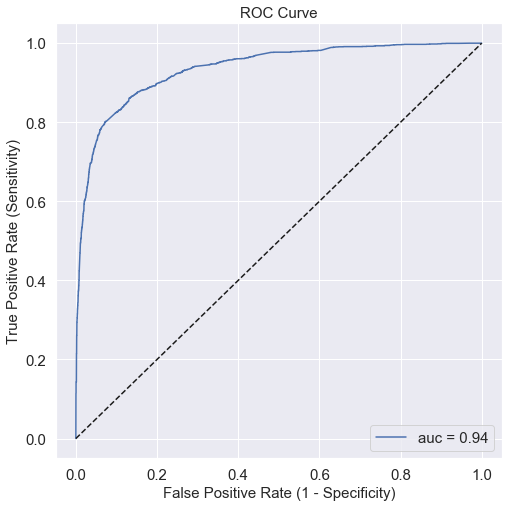

In [154]:
#plotting the ROC curve to see variation of fpr and tpr w.r.t cut-off
#We would like to see very high tpr and very low fpr for any threshold
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.figure(figsize=(8, 8))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, 'b-', label='auc = %0.2f' %auc_measure)
plt.plot([0,1], [0,1], 'k--')
plt.legend(loc="lower right")
plt.show()

### Area under the curve looks really good.

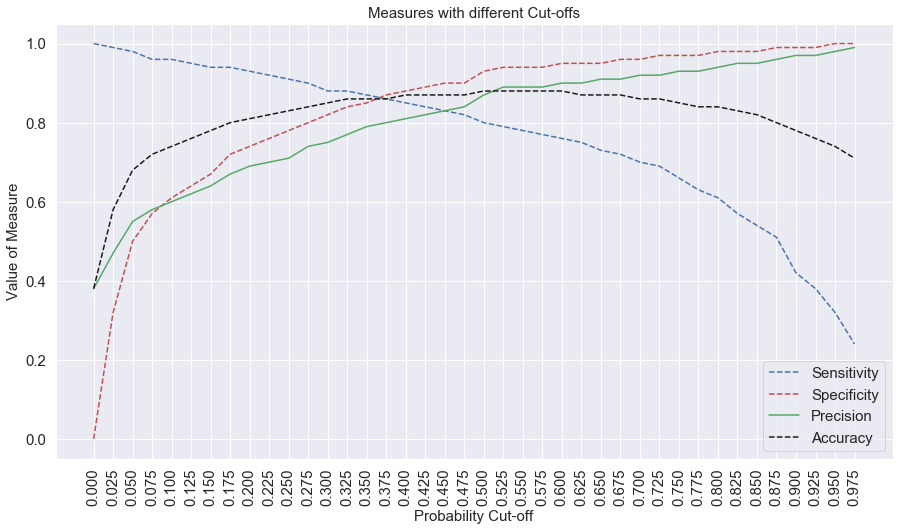

In [155]:
#Lets calculate sensitivity, specificity and accuracy for different probability cut-off.

cutoffs = list(np.arange(0, 1, 0.025))
sensitivities = []
specificities = []
precision_scores = []
accuracies = []
for cutoff in cutoffs:
    pred_label = list(result['Conversion_Probability'].apply(lambda val : 1 if val > cutoff else 0))
    tn, fp, fn, tp = confusion_matrix(result['Converted'], pred_label).ravel()
    sensitivities.append(round((tp/(tp+fn)),2))
    specificities.append(round((tn/(tn+fp)),2))
    precision_scores.append(round((tp/(tp+fp)),2))
    accuracies.append(round(((tp+tn)/(tp+fn+tn+fp)),2))
#
#After having calculated the measures for all cut-offs we can plot it
#
plt.figure(figsize=(15, 8))
plt.title('Measures with different Cut-offs')
plt.xlabel('Probability Cut-off')
plt.ylabel('Value of Measure')
plt.xticks(cutoffs, rotation=90)
plt.plot(cutoffs, sensitivities, 'b--', label='Sensitivity')
plt.plot(cutoffs, specificities, 'r--', label='Specificity')
plt.plot(cutoffs, precision_scores, 'g-', label='Precision')
plt.plot(cutoffs, accuracies, 'k--', label='Accuracy')
plt.legend(loc="lower right")
plt.show()

### <font color='green'> Since the company is targetting a lead conversion rate of 80%, we need to choose a cut-off which can ensure this target is met. </font>

### <font color='green'> Out of all the leads this model predicts, the expectation is that atleast 80% of them get converted. This means that, model precision has to be atleast 80%. </font>

### <font color='green'> From the above plot of measures versus cutoff, precision of 0.8 is seen at cutoff between 0.375 and 0.450 </font>

### <font color = 'green'> Keeping some buffer to account for small errors, lets choose the probability cut-off as 0.45 to achieve the target lead conversion of 80%. </font>

In [156]:
result['Label_Predicted'] = result['Conversion_Probability'].apply(lambda val : 1 if val > 0.45 else 0)
result.head(10)

,Converted,Conversion_Probability,Label_Predicted
3392,0,0.013227,0
1011,1,0.373815,0
5138,0,0.012218,0
3188,0,0.030325,0
5645,1,0.958793,1
7245,0,0.045076,0
4346,1,0.715104,1
9038,0,0.003103,0
42,0,0.015682,0
238,1,0.929443,1


In [157]:
#Looking at the final metrics for train dataset.
tn, fp, fn, tp = confusion_matrix(result['Converted'], result['Label_Predicted']).ravel()
print('Sensitivity % = ', round((100*(tp/(tp+fn))),2))
print('Specificity % = ', round((100*(tn/(tn+fp))),2))
print('Precision % = ', round((100*(tp/(tp+fp))),2))
print('Accuracy % = ', round((100*((tp+tn)/(tp+fp+tn+fn))),2))

Sensitivity % =  82.95
Specificity % =  89.53
Precision % =  82.91
Accuracy % =  87.03


### - Evaluation on the test set

In [158]:
#Lets scale the test set and take only the required columns for the model
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test.loc[:,X_train.columns.tolist()]

In [159]:
#Lets predict the probability of leads for the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = logreg_sm.predict(X_test_sm)
y_test_pred.head()

3144    0.011783
2337    0.545999
7249    0.026644
6862    0.072476
7057    0.040405
dtype: float64

In [160]:
#Lets contruct a dataframe with converted column and predicted probabilities
result_test = pd.DataFrame({'Converted':y_test,'Conversion_Probability':y_test_pred})
result_test.head()

,Converted,Conversion_Probability
3144,0,0.011783
2337,0,0.545999
7249,0,0.026644
6862,0,0.072476
7057,1,0.040405


In [161]:
#Lets add predicted labels with cutoff as 0.425
result_test['Label_Predicted'] = result_test['Conversion_Probability'].apply(lambda val : 1 if val > 0.45 else 0)
result_test.head()

,Converted,Conversion_Probability,Label_Predicted
3144,0,0.011783,0
2337,0,0.545999,1
7249,0,0.026644,0
6862,0,0.072476,0
7057,1,0.040405,0


In [162]:
#Looking at the final metrics for test dataset.
tn, fp, fn, tp = confusion_matrix(result_test['Converted'], result_test['Label_Predicted']).ravel()
print('Sensitivity % = ', round((100*(tp/(tp+fn))),2))
print('Specificity % = ', round((100*(tn/(tn+fp))),2))
print('Precision % = ', round((100*(tp/(tp+fp))),2))
print('Accuracy % = ', round((100*((tp+tn)/(tp+fp+tn+fn))),2))

Sensitivity % =  82.96
Specificity % =  89.47
Precision % =  82.64
Accuracy % =  87.02


### <font color='green'> The model worked well for test dataset and precision score of around 82% also looks good. </font>